# Сборный проект 1

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Знакомство с данными

In [1]:
import pandas as pd
try:
    df = pd.read_csv('datasets\games.csv')
except:
    df = pd.read_csv(r'datasets\games.csv')

In [2]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## 1. Подготовка данных

### 1.1 Переименование столбцов

In [4]:
df.columns = df.columns.str.lower()

###  1.2 Приведение типов

year_of_release - к типу datetime, чтобы можно было работать с данными, как со временем   
user_score - к типу float, для выполнения арифмитических операций в дальнейшем 

In [5]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y')
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan') # tbd - на Nan
df['user_score'] = df['user_score'].astype(float) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


###  1.3 Замена дубликатов

In [6]:
df.duplicated().sum()

0

Явных дубликатов в выборке не оказалось.

In [7]:
len(df['name'].str.lower().unique())
print(df.groupby('name').count()['platform'].sum())

16713


По имени дубликатов не оказалось также. Что если есть совпадения по платформе и имени?

In [8]:
df.duplicated(subset=['platform','name']).sum()
df[df.duplicated(subset=['platform','name'],keep=False)].sort_values(by=['platform','name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5972,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaT,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
1190,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [9]:
df = df.drop(index=[659,14244,16230,4127],axis=0)
df.reset_index(drop=True,inplace=True)

Действительно такие есть, но лишь два объекта под индексом 659,14244,16230,4127 - которые является не информативным из пары строк, поэтому его и удалим. Что касательно  Need for Speed: Most Wanted, то в таблице находятся переиздания на платформе за 2012 и 2005 год. 

In [10]:
df[df.duplicated(subset=['platform','name'],keep=False)].sort_values(by=['platform','name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5970,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11713,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1189,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


По другим полям уже не может существовать неявных дубликатов, поэтому перейдем к обрабокте пропусков.

### 1.4 Обработка пропусков

In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [12]:
names_isna = ['name','year_of_release','genre']
for name in names_isna:
    index=df[df[name].isna()].index
    df = df.drop(index).reset_index(drop=True)

Пропуски, которые сложно восстановить
* **critic_score**,**user_score** - много пропусков одновременно нет, так как мб не было площадок, где люди могли бы оставлять отзывы об играх, либо же эти самые игры не были размещены на каком-нибудь форуме - в зависимости от года выпуска игры
* **rating** - пропуски могут быть из-за того, что возрастной рейтинг ставился в другой системе, которая не соотносится с ESRB, либо системы оценки игры раньше до какого-то года не могло быть, поэтому им не был присужден рейтинг  
Сами по себе пропуски не восстановимы из данных, что имеются, поэтому оставим их, держа в голове, что там они есть.

In [13]:
df['rating'].fillna('ND',inplace=True) # ND - not defiened - не определен
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

ND вместо Nan - как заглушка на категориальные данные

### 1.5 Обработка данных

In [14]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38


## Исследовательский анализ данных

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

**Важны ли данные за все периоды?**

<AxesSubplot:>

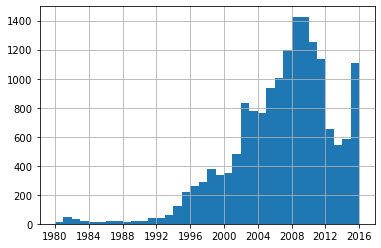

In [16]:
df['year_of_release'].hist(bins=36)

Начиная с **2014 года по 2016 год - актуальный период**, на который стоит ориентироваться, поскольку видно, что тренды быстро меняются, поэтому чтобы не оказаться в заблуждение и не рассматривать "мертвые" тренды, возьмем достаточно короткий период за актуальный.

*Рассмотрим топ-5 платформ по суммарным продажам за все время их существования*

In [17]:
total_sales_top = df.pivot_table(index='platform',values='total_sales',aggfunc={'sum'}).sort_values(['sum'],ascending=False)[:5]
total_sales_top

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78


**За какой характерный срок появляются новые и исчезают старые платформы?**  
*Построим распределение продаж каждой платформы по годам*

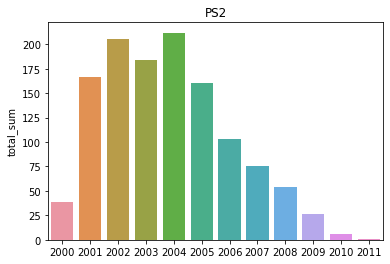

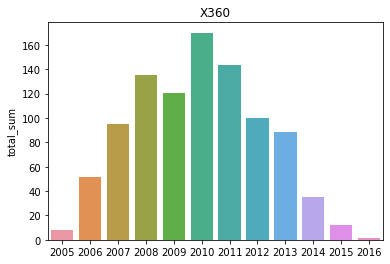

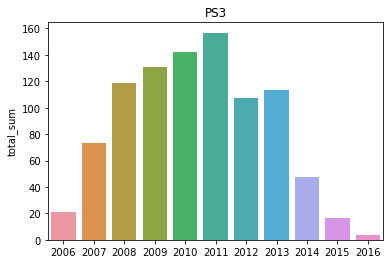

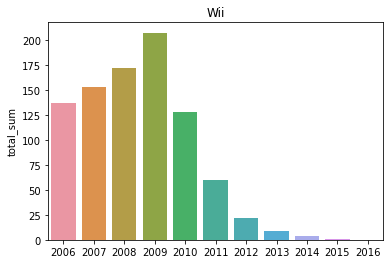

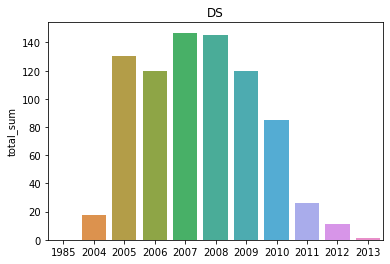

In [18]:
for platform in total_sales_top.index:
    df_info = df.query('platform == @platform').pivot_table(index='year_of_release',values='total_sales',aggfunc={'sum'})
    years= [el.year for el in df_info.index.date] # преобразуем индексы в года
    sns.barplot(x=years,y=df_info['sum']).set(title=platform,ylabel='total_sum')
    plt.show()

*Характерный срок жизни для игровой платформы приблизительно **9-10 лет**, также на примере серии PlayStation - можно увидеть, что новые платформы появляются через **6 лет** после выхода предыдущей.*

**Отфильтруем данные для работы, так, чтобы игры, соотвествовали актуальному периоду** 

Период жизни платформ около 10 лет, что достаточно динамично для рынка, поэтому для прогноза на предстоящий год, возьмем данные за последние 3 года.

In [19]:
df_actually = df.query('year_of_release >= 2014') # таблица, соответств. актуальному периоду

**Какие платформы лидируют по продажам, растут или падают?**

In [20]:
df_actually_groped_pf = (df_actually
     .pivot_table(index=['platform','year_of_release'],
                        values='total_sales',
                        aggfunc='sum')
     .reset_index() # избавляемся от мульти-индекса
    )

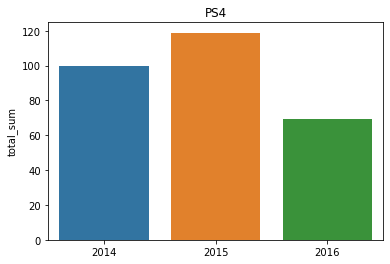

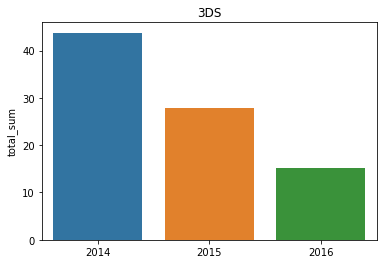

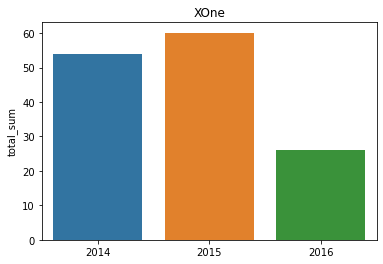

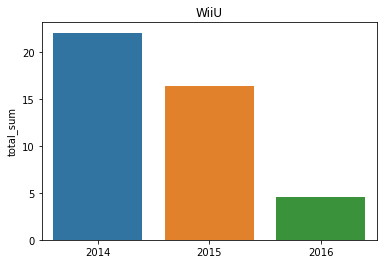

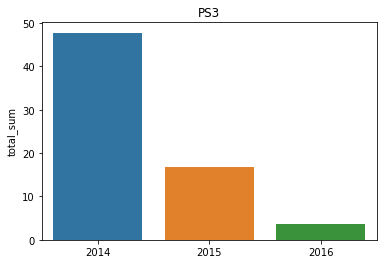

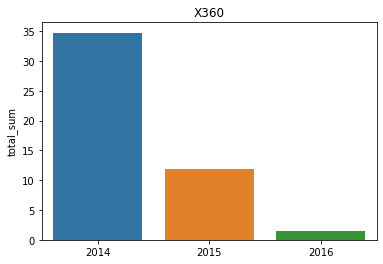

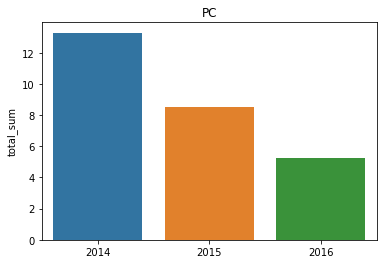

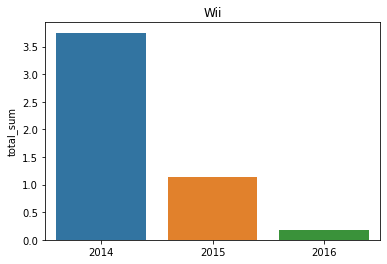

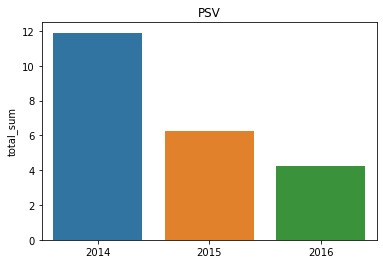

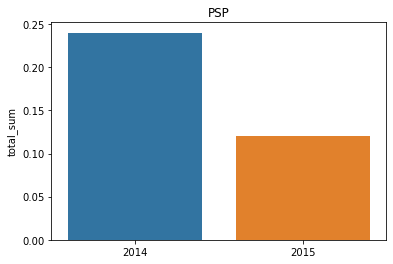

In [21]:
for name_platform in df_actually['platform'].unique():
    pf_years = df_actually_groped_pf.query('platform == @name_platform')
    years= [el.year for el in pf_years['year_of_release']]
    sns.barplot(y=pf_years['total_sales'],x=years).set(title=name_platform,ylabel='total_sum')
    plt.show()

**Нам интересны данные, как минимум, об игровых платформах, у которых есть продажи за 2016 год. Среди таких:**
- [ ] Wii  
 *Имеет убывающий тренд, и находится на минимуме своей популярности для разработчиков игр/ Должно быть причина в том, что 
 в 2012 году появляется WiiU, которая является продолжением линейки, к тому же на 2017 год - платформе будет 11 лет, что выбивается из продолжительности жизни платформ*
- [ ] X360  
 *Аналогичная ситуация как у Wii, вышло следующее поколение платформы - Xbox One*
- [ ] PS3  
 *Все точно также как у Wii и X360, комьюнити отдает предпочтение PS4*
- [x] PS4  
 *Платформа достаточно молодая, ей всего 4 года, но уже наблюдается просадка в 2016 году, возможно, что-то произошло с индустрией, либо это связано с тем, что в данных неполный 2017 год*
- [ ] 3DS  
 *Во-первых, есть тренд - убывающий, то есть количество проданных копий игр на этой платформе становится меньше. Во-вторых, по масштабу может показаться, что общий объем денег достаточно высокий на 2016 год, но на самом деле он сопоставим с минимумом для остальных вышеперечисленных исключенных из списка платформ*
- [x] PC  
 *Продолжительность платформы в данном случае не измеримо, так как компьютеры остаются актуальными всегда. Если рассмотреть распределение, то кажется, что продажи игр на PC имеют периодичность, и может быть в 2017 году окажется рост продаж.*
- [x] XOne  
 *Аналогично как у PS4, в обоих случаях должен быть рост*
- [x] WiiU  
 *Наблюдается некоторый отскок проданных копий вниз, но, возможно, это из-за недостатка данных за 2016 год, в таком случае объем копий - достаточный, чтобы назваться популярной платформой на актуальный период*
- [ ] PSV  
 *Продажи явным образом не растут. Либо остаются на том же уровне, либо уменьшаются - во всяком случае по своему объему, они дотстаточно маленькие*  
 ______________________________________________________________________________________________________
 *PSP* - платформа, на которой, насколько нам известно из данных, не выпускались игры в 2016 году, и возможно она уже не интересна нам  
 **Вывод: PS4, XOne, PC, WiiU - самые перспективные платформы на 2017 год** 

**Рассмотрим диаграмму размаха продаж для платформ**

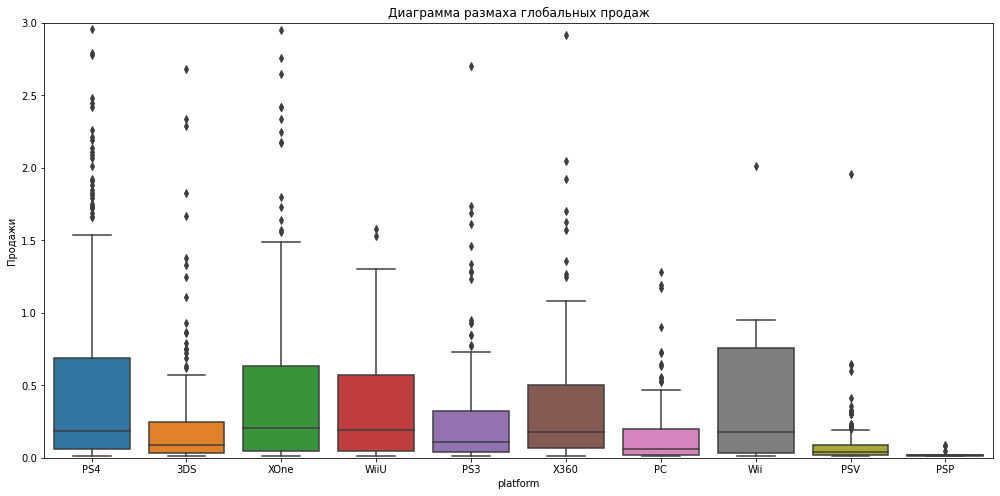

In [22]:
plt.figure(figsize=(17,8))
sns.boxplot(x='platform',y='total_sales',data=df_actually).set(title='Диаграмма размаха глобальных продаж',ylabel='Продажи')
plt.ylim(0,3);

PC,PSV, DC, PSP - имееют самую маленькую медиану по продажам среди всех платформ  
WiiU, XOne и PS4 - имеют одинаковую медиану, значением около 0,25*10^6 проданных копий  
PS4 и X360 - верхняя граница этих платформ, наибольшая в акутальном периоде, за ними по уровню границы будут - XOne и PS3

**Влияют ли на продажи отзывы пользователей и критиков?**  
Проверим данную гипотезу на примере популярных платформ, которые мы оценивали ранее

In [23]:
def corr_info(name):
    df_corr = df_actually.query('platform == @name')
    critic_corr = df_corr.plot(kind='scatter',x='critic_score',y='total_sales',alpha=0.25,title=name);
    user_corr = df_corr.plot(kind='scatter',x='user_score',y='total_sales',alpha=0.25);
    print(f'''
        Коэффициент корреляции продаж от оценок пользователей - {df_corr['total_sales'].corr(df_corr['user_score'])} для {name}
        Коэффициент корреляции продаж от оценок критиков - {df_corr['total_sales'].corr(df_corr['critic_score'])} для {name}
    ''',end='\n------------------------------------------------------------------------------------------------\n')
    
    


        Коэффициент корреляции продаж от оценок пользователей - -0.07159665703472454 для PC
        Коэффициент корреляции продаж от оценок критиков - 0.17463413769350025 для PC
    
------------------------------------------------------------------------------------------------

        Коэффициент корреляции продаж от оценок пользователей - -0.07038392806475818 для XOne
        Коэффициент корреляции продаж от оценок критиков - 0.428676943703332 для XOne
    
------------------------------------------------------------------------------------------------

        Коэффициент корреляции продаж от оценок пользователей - -0.040131589472697286 для PS4
        Коэффициент корреляции продаж от оценок критиков - 0.402661410681041 для PS4
    
------------------------------------------------------------------------------------------------

        Коэффициент корреляции продаж от оценок пользователей - 0.40792645792170784 для WiiU
        Коэффициент корреляции продаж от оценок критиков - 0

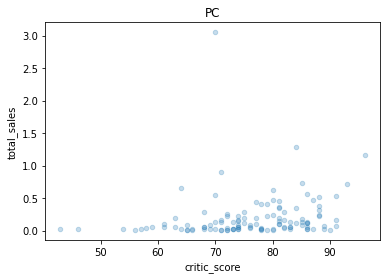

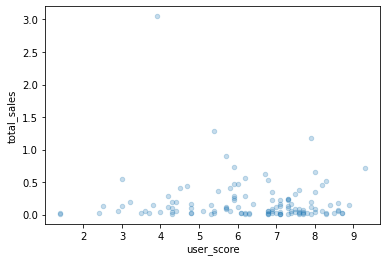

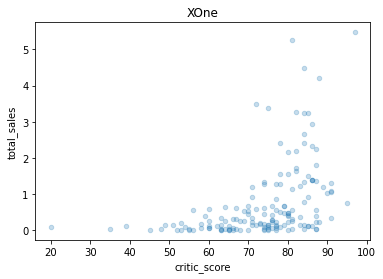

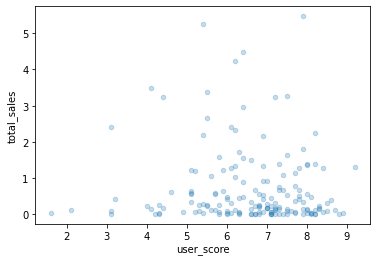

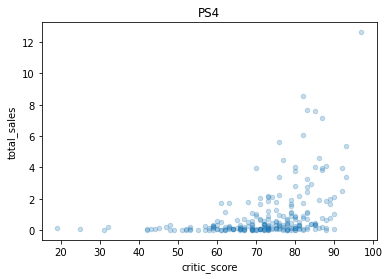

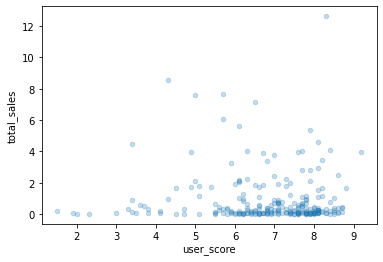

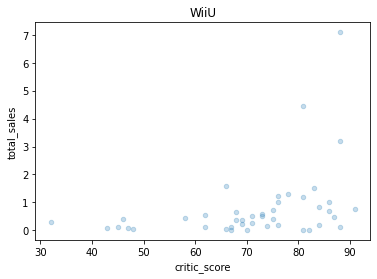

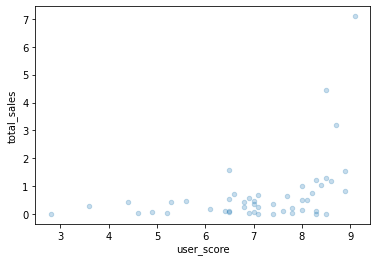

In [24]:
for name in ['PC','XOne','PS4','WiiU']:
    x = corr_info(name)

* Между оценками пользователей и количеством проданных копий корреляция не существует, кроме как у платформы WiiU, в случае которой можно предположить, что игроки WiiU относятся внимательно к оценкам других игроков
* А вот в случае оценков критиков есть некоторая положительная связь, что может обозначать, что мнение критиков слабым образом, но влияет на количество проданных копий среди всех платформ

**Какие жанры самые прибыльные? Что об этих жанрах можно сказать? Выделяются ли жанры с высокими и низкими продажами?**

In [25]:
df_actually_genre = df_actually.pivot_table(index='genre',values='total_sales',aggfunc=('sum','mean','median','count')).sort_values(by='sum',ascending=False)

In [26]:
df_actually_genre

,count,mean,median,sum
genre,,,,
Action,619,0.322068,0.090,199.36
Shooter,128,1.335469,0.515,170.94
Sports,161,0.680000,0.180,109.48
Role-Playing,221,0.459005,0.110,101.44
Misc,113,0.332301,0.090,37.55
Fighting,60,0.470333,0.125,28.22
Racing,69,0.398841,0.090,27.52
Platform,38,0.476053,0.140,18.09
Adventure,185,0.094865,0.030,17.55


* **Shooter** - самый прибыльный жанр, так как у игр в этом жанре медианное и среднее значение проданных миллион копий - наибольшее
* **Sports** и **Action** следующие жанры, разделяющие 2 и 3 место по этим критеряим, соотвественно 
* **Adventure** - достаточно популярный жанр по числу игр, но имеющий низкие показатели по продажам
* **Puzzle и Strategy** самые не популярные и плохо продающиеся жанры игр

# Портрет пользователя каждого региона

### Топ 5 платформ по регионам

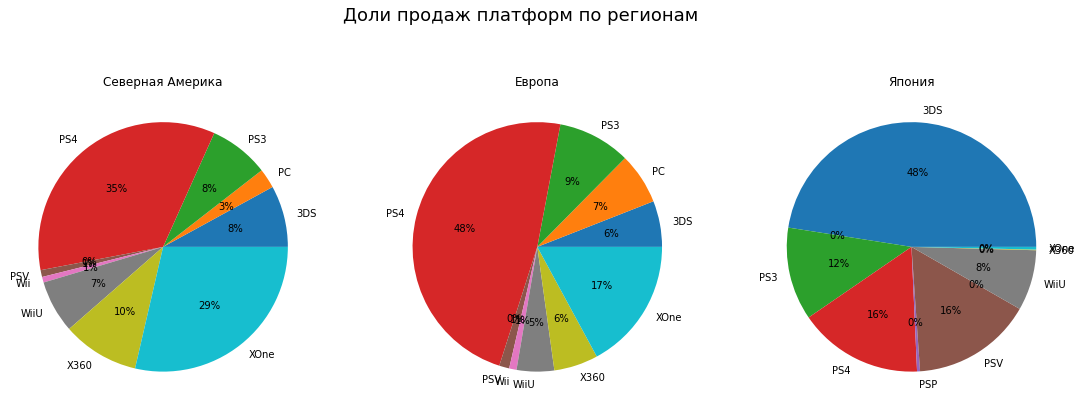

In [27]:
regions = ['na_sales','eu_sales','jp_sales']
df_region = df_actually.pivot_table(index='platform',values=regions,aggfunc=('sum'))
fig=plt.figure(figsize=(15,12))
fig.suptitle('Доли продаж платформ по регионам',fontsize=18)
i=1;
for region in (regions):
    ax=fig.add_subplot(1,3,i)
    if(region==regions[0]):
        name='Северная Америка'
    elif(region==regions[1]):
        name='Европа'
    else: 
        name='Япония'
    df_region[region].plot(kind='pie', autopct='%.0f%%',figsize=(19,7),title=name,ax=ax,ylabel='')
    df_region['%_total_sales_'+region] = round(df_region[region]/df_region[region].sum()*100,0)
    i+=1

In [28]:
region_top = pd.DataFrame(
    {region : df_region.sort_values(by=region,ascending=False).index[:5].array for region in regions}
)
region_percentage = pd.DataFrame(
    {region : df_region.sort_values(by=region,ascending=False)['%_total_sales_'+region][:5] for region in regions}
)
region_top.index = [i+1 for i in range(5)] # индекс имееет значение в топе для региона
region_percentage.fillna(0,inplace=True)
region_percentage = region_percentage.T
region_percentage

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
na_sales,8.0,0.0,8.0,35.0,0.0,0.0,10.0,29.0
eu_sales,6.0,7.0,9.0,48.0,0.0,0.0,0.0,17.0
jp_sales,48.0,0.0,12.0,16.0,16.0,8.0,0.0,0.0


In [29]:
region_top = region_top .T
region_top

,1,2,3,4,5
na_sales,PS4,XOne,X360,3DS,PS3
eu_sales,PS4,XOne,PS3,PC,3DS
jp_sales,3DS,PS4,PSV,PS3,WiiU


In [30]:
region_info = region_top.join(region_percentage)
region_info

,1,2,3,4,5,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
na_sales,PS4,XOne,X360,3DS,PS3,8.0,0.0,8.0,35.0,0.0,0.0,10.0,29.0
eu_sales,PS4,XOne,PS3,PC,3DS,6.0,7.0,9.0,48.0,0.0,0.0,0.0,17.0
jp_sales,3DS,PS4,PSV,PS3,WiiU,48.0,0.0,12.0,16.0,16.0,8.0,0.0,0.0


**Из конечной таблицы очевидно, что по регионам в период 2007-2016 год, самыми популярными платформами были:**
* В Северной Америке - **PS4**
* В Европе - **PS4**
* В Японии - **3DS**  
_______________________________
Также стоит пояснить, что нули существующие в таблице - не абсолютные, то есть на самом деле у этих платформ есть какая-то доля в этом регионе, но 0 обозначает, что платформа не входит в топ 5 продажам для этого региона.  
* Поэтому инетерсным образом можно заключить, что PSP и 3DS платформы являются особенными для японского рынка, что являются единственными платформами входящими в  топ 5, какого либо региона. 
* Помимо этого в Японии мало общего в любимых платформах для Европы и Сев. Америки - PS4 и X360 также не входит в их топ покупок.  
* В Северной Америке и Европе выбор платформ остается одинаковым, но ранжируется их порядок в этом самом топе, то есть между их платформами в топе - нет различий.

### Топ  - 5 жанров игр по регионам.

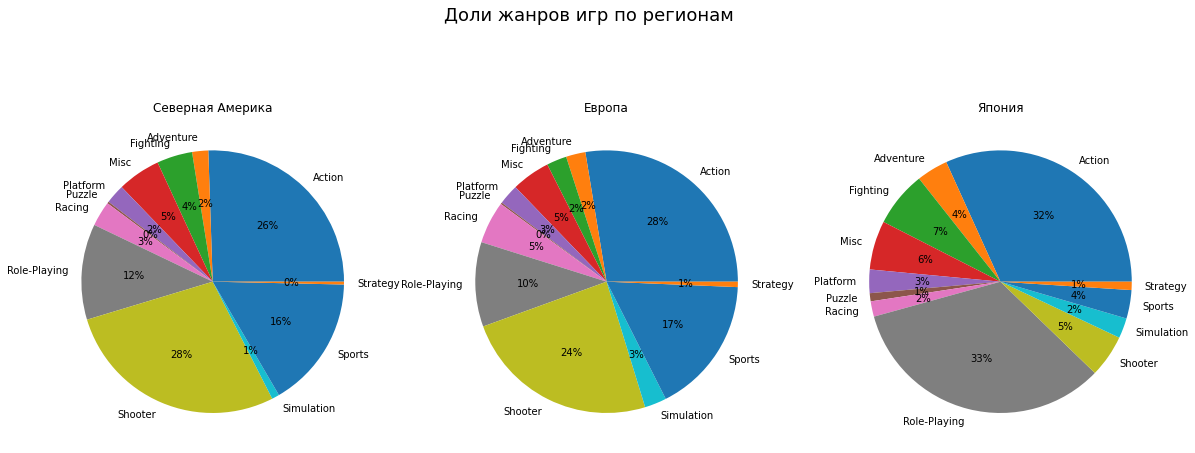

In [31]:
df_region_genre = df_actually.pivot_table(index='genre',values=regions,aggfunc=('sum'))
fig=plt.figure(figsize=(18,16))
fig.suptitle('Доли жанров игр по регионам',fontsize=18)
i=1;
for region in regions:
    ax=fig.add_subplot(1,3,i)
    if(region==regions[0]):
        name='Северная Америка'
    elif(region==regions[1]):
        name='Европа'
    else: 
        name='Япония'
    df_region_genre[region].plot(kind='pie', autopct='%.0f%%',figsize=(20,8),title=name,ax=ax,ylabel='')
    i+=1

In [32]:
region_top_genre = pd.DataFrame(
    {region : df_region_genre.sort_values(by=region,ascending=False).index[:5].array for region in regions}
)
region_top_genre.index = [i+1 for i in range(5)]
region_top_genre

,na_sales,eu_sales,jp_sales
1,Shooter,Action,Role-Playing
2,Action,Shooter,Action
3,Sports,Sports,Fighting
4,Role-Playing,Role-Playing,Misc
5,Misc,Racing,Shooter


В топе популярных жанров по регионам разницы между Северной Америкой и Европой не наблюдается, даже если посмотреть Role-Playing на круговой диаграмме для Европы то он составляет практически такую же долю, как и Racing, с точностью до целых процентов. 
В Японии кардинально другие предпочтения в жанрах.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

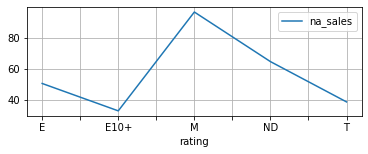

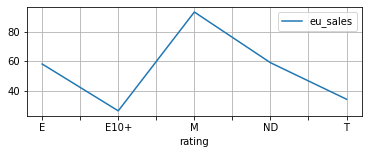

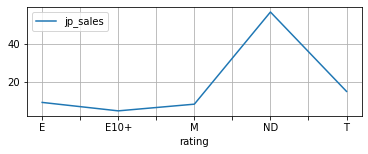

In [33]:
for region in regions:
    df_rate = df_actually.pivot_table(index='rating',values=region,aggfunc='sum').plot(kind='line',grid=True,figsize=(6,2))

Сначала рассмотрим Северную Америку и Европу. Можно представить, что по горизонтали с каждой следующей категорией увеличивается возрастной рейтинг, кроме категории ND - которая не описывает, к какой категории относятся проданные копии игр.
В таком случае, чем выше возрастной рейтинг, тем меньшее число копий можно ожидать продать.  
По Японии очень много ND - должно быть это связано с **CERO** (Computer Entertainment Rating Organization), которая устанавливает возрастной рейтинг в своих категориях. А данные, что нам известны, это игры, созданные и выпущенные сначала на не японской территории. Но даже без этого факта в Японии наблюдается такая же зависимость, как и в Америке с Европой.

# Проверка гипотез

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
* Нулевая гипотеза: Средний пользовательский рейтинг Xbox One совпадает со среднем пользовательским рейтингом PC
* Альтернативная гипотеза: Средний пользовательский рейтинг *НЕ* совпадает со среднем пользовательским рейтингом PC
______________________
Поскольку гипотеза сформулирована о проверке среднего 2 генеральных совокупностей, то мы будем использовать критерий Стьюдента или так называемый t-тест.  
Примем критический уровень статистической значимости - 0.05.

In [34]:
from scipy import stats as st
import numpy as np
alpha=0.05
df_xone = df_actually[df_actually['user_score'].notna()].query('platform == "XOne"')['user_score']#ОЧИСТИМ ОТ NAN, ТАК КАК Т-ТЕСТ ЧУВСТВИТЕЛЕН 
df_pc = df_actually[df_actually['user_score'].notna()].query('platform == "PC"')['user_score'] #КПРОПУСКОМ
results = st.ttest_ind(df_xone,
                       df_pc,
                      equal_var=False) # у выборок должна быть разная дисперсия
print('p-value:',results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу не получилось отвергнуть')



p-value: 0.11601398086668832
Нулевую гипотезу не получилось отвергнуть


**Вывод:** средние пользовательские оценки у Xbox One и PC - разные.

2. **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports - равны 
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports - разные
______________________
Поскольку гипотеза сформулирована о проверке среднего 2 генеральных совокупностей, то мы будем использовать критерий Стьюдента или так называемый t-тест.  
Примем критический уровень статистической значимости - 0.05.

In [35]:
alpha=0.05
df_action = df_actually[df_actually['user_score'].notna()].query('genre == "Action"')['user_score']#ОЧИСТИМ ОТ NAN, ТАК КАК Т-ТЕСТ ЧУВСТВИТЕЛЕН 
df_sports = df_actually[df_actually['user_score'].notna()].query('genre == "Sports"')['user_score'] #КПРОПУСКОМ
results = st.ttest_ind(df_action,
                       df_sports,
                      equal_var=False) # у выборок должна быть разная дисперсия
print('p-value:',results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу не получилось отвергнуть')
    

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** Да, действительно, средние пользовательских рейтинги этих жанров - разные.

# Общий вывод
1. В ходе работы были предобработаны данные - удалены пропуски, где это возможно, приведены типы данных, установлены заглушки в категориальных данных.
2. Средняя жизнь платформы оказалось 9-10 лет.
3. За актуальный период в данных был выбран период с 2014 по 2016 год.
4.  PS4, XOne, PC, WiiU - самые перспективные платформы на 2017 год, по потенциальному объекму проданных копий
5.  PS4 и XOne - платформы среди акутального периода, у которых самая высокая верхняя граница и медиана по числу проданных копий игр для какой либо игры
6. Shooter - самый прибыльный жанр игр
7. Пользователи Севереной Америки и Европы не отличаются в выборе платформы и жанров, в отличии от Японии, где абсолютно своя культура игр
8. Чем меньше возрастной ценз, тем больше проданных копий окажется у игры